# Convert data from raw .CEL to expression matrix.  Example GSE48350

Using rma from affy R package. This function computes the RMA (Robust Multichip Average) expression measure described in Irizarry et al Biostatistics (2003).

Note that this expression measure is given to you in log base 2 scale and normalised.

Check this is done: In Affymetrix arrays, it is necessary to summarize the different signals obtained from all the probes representing one gene in a unique value.

In [1]:
suppressPackageStartupMessages(library(affy,gcrma))
suppressPackageStartupMessages(library(GEOquery))

In [2]:
geopath="/mnt/data/GWES/Microarray/output/geo_downloads"
dir.create(file.path(geopath))

Warning message in dir.create(file.path(geopath)):
"'/mnt/data/GWES/Microarray/output/geo_downloads' already exists"


## Download raw CEL files

In [3]:
my.gse <- "GSE48350"

In [4]:
# Get suplementary files from NCBI GEO site
options(timeout = 240) # Increase timeout (in seconds)
getGEOSuppFiles(my.gse, makeDirectory=T, baseDir=geopath)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/mnt/data/GWES/Microarray/output/geo_downloads/GSE48350/GSE48350_RAW.tar,1296158720,FALSE,664,2021-02-25 18:26:00,2021-02-25 18:26:00,2021-02-25 18:24:56,1005,1005,momic,momic


In [5]:
##list files in downloaded
list.files(path=paste(geopath,my.gse,sep="/"))

[1] "GSE48350_RAW.tar"

In [6]:
# Creates a directory and download the "tarball" that contains gzipped CEL files. 
# We need to untar the tarball but we do not need to unzip the CEL files. R can read them in compressed format.
untar(paste(geopath,my.gse,paste0(my.gse,"_RAW.tar"),sep="/"), exdir=paste(geopath,my.gse,"CEL",sep="/"))
list.files(paste(geopath,my.gse,"CEL",sep="/"))

[1] "GSM1176196_1105A-08_EC_48_Affy.CEL.gz"    
  [2] "GSM1176197_1105A-08_EC_15.CEL.gz"         
  [3] "GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz" 
  [4] "GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz" 
  [5] "GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz" 
  [6] "GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz" 
  [7] "GSM1176202_1105A-08_EC_75_Affy.CEL.gz"    
  [8] "GSM1176203_1105A-08_EC_11.CEL.gz"         
  [9] "GSM1176204_1205A-07-EC-69_AffyHyb.CEL.gz" 
 [10] "GSM1176205_1105A-08_EC_51.CEL.gz"         
 [11] "GSM1176206_1105A-08_EC_74.CEL.gz"         
 [12] "GSM1176207_1105A-08_EC_92_Affy.CEL.gz"    
 [13] "GSM1176208_1205A-07_EC-19_AffyHyb.CEL.gz" 
 [14] "GSM1176209_0606A-05_EC_05_AffyHyb.CEL.gz" 
 [15] "GSM1176210_0606A-05_EC_90_AffyHyb.CEL.gz" 
 [16] "GSM1176211_1105A-08_HC-20_Affy_2.CEL.gz"  
 [17] "GSM1176212_1105A-08_HC_37.CEL.gz"         
 [18] "GSM1176213_1205A-07_HC-48_AffyHyb.CEL.gz" 
 [19] "GSM1176214_1205A-07-HC-16_AffyHyb.CEL.gz" 
 [20] "GSM1176215_1105A-08_HC_15.CEL.gz"         
 [21] "GSM1176216_1105A-08_HC_24.CEL.gz"         
 [22] "GSM1176217_0606A-05_HC_23_AffyHyb.CEL.gz" 
 [23] "GSM1176218_0606A-05_HC_36_AffyHyb.CEL.gz" 
 [24] "GSM1176219_1105A-08_HC-75_Affy.CEL.gz"    
 [25] "GSM1176220_1105A-08_HC-11_Affy.CEL.gz"    
 [26] "GSM1176221_1105A-08_HC_33_Affy.CEL.gz"    
 [27] "GSM1176222_1105A-08_HC-69_Affy.CEL.gz"    
 [28] "GSM1176223_0606A-05_HC_07_AffyHyb.CEL.gz" 
 [29] "GSM1176224_1205A-07_HC-43_AffyHyb.CEL.gz" 
 [30] "GSM1176225_1105A-08_HC-51_Affy.CEL.gz"    
 [31] "GSM1176226_1105A-08_HC_92_Affy.CEL.gz"    
 [32] "GSM1176227_1205A-07_HC-19_AffyHyb.CEL.gz" 
 [33] "GSM1176228_0606A-05_HC_05_AffyHyb.CEL.gz" 
 [34] "GSM1176229_1205A-07-HC-90_AffyHyb.CEL.gz" 
 [35] "GSM1176230_0606A-05_PCG_20_AffyHyb.CEL.gz"
 [36] "GSM1176231_1205A-07_PCG-37_AffyHyb.CEL.gz"
 [37] "GSM1176232_1105A-08_PCG_48_Affy.CEL.gz"   
 [38] "GSM1176233_1105A-08_PCG_15_Affy.CEL.gz"   
 [39] "GSM1176234_1105A-08_PCG_13_Affy.CEL.gz"   
 [40] "GSM1176235_0606A-05_PCG_09_AffyHyb.CEL.gz"
 [41] "GSM1176236_0306A-02_PCG-24_AffyHyb.CEL.gz"
 [42] "GSM1176237_0606A-05_PCG_57_AffyHyb.CEL.gz"
 [43] "GSM1176238_1205A-07_PCG-23_AffyHyb.CEL.gz"
 [44] "GSM1176239_1105A-08_PCG_36.CEL.gz"        
 [45] "GSM1176240_1205A-07_PCG-06_AffyHyb.CEL.gz"
 [46] "GSM1176241_1205A-07_PCG-75_AffyHyb.CEL.gz"
 [47] "GSM1176242_1105A-08_PCG_11_Affy.CEL.gz"   
 [48] "GSM1176243_1205A-07_PCG-70_AffyHyb.CEL.gz"
 [49] "GSM1176244_1205A-07_PCG-64_AffyHyb.CEL.gz"
 [50] "GSM1176245_1105A-08_PCG_33_Affy.CEL.gz"   
 [51] "GSM1176246_1205A-07_PCG-69_AffyHyb.CEL.gz"
 [52] "GSM1176247_1205A-07_PCG-07_AffyHyb.CEL.gz"
 [53] "GSM1176248_1105A-08_PCG_51_Affy.CEL.gz"   
 [54] "GSM1176249_1205A-07_PCG-74_AffyHyb.CEL.gz"
 [55] "GSM1176250_1205A-07_PCG-92_AffyHyb.CEL.gz"
 [56] "GSM1176251_0606A-05_PCG_19_AffyHyb.CEL.gz"
 [57] "GSM1176252_1105A-08_PCG-44_Affy.CEL.gz"   
 [58] "GSM1176253_0306A-02_PCG-05_AffyHyb.CEL.gz"
 [59] "GSM1176254_1205A-07_PCG-90_AffyHyb.CEL.gz"
 [60] "GSM1176255_1205A-07_SG-37_AffyHyb.CEL.gz" 
 [61] "GSM1176256_1105A-08_SG-48_Affy.CEL.gz"    
 [62] "GSM1176257_0306A-02_SG-15_AffyHyb.CEL.gz" 
 [63] "GSM1176258_1005A02_SG-9_AffyHyb.CEL.gz"   
 [64] "GSM1176259_0306A-02_SG-24_AffyHyb.CEL.gz" 
 [65] "GSM1176260_0606A-05_SG_57_AffyHyb.CEL.gz" 
 [66] "GSM1176261_0606A-05_SG_91_AffyHyb.CEL.gz" 
 [67] "GSM1176262_1205A-07_SG-23_AffyHyb.CEL.gz" 
 [68] "GSM1176263_1005A02_SG-36_AffyHyb.CEL.gz"  
 [69] "GSM1176264_1005A02_SG-6_AffyHyb.CEL.gz"   
 [70] "GSM1176265_1105A02_SG-75_AffyHyb.CEL.gz"  
 [71] "GSM1176266_1105A02_SG-11_AffyHyb.CEL.gz"  
 [72] "GSM1176267_1105A02_SG-70_AffyHyb.CEL.gz"  
 [73] "GSM1176268_1205A-07_SG-64_AffyHyb.CEL.gz" 
 [74] "GSM1176269_1005A02_SG-33_AffyHyb.CEL.gz"  
 [75] "GSM1176270_1105A-08_SG-51_Affy.CEL.gz"    
 [76] "GSM1176271_1105A02_SG-74_AffyHyb.CEL.gz"  
 [77] "GSM1176272_0306A-02_SG-92_AffyHyb.CEL.gz" 
 [78] "GSM1176273_1105A02_SG-44_AffyHyb.CEL.gz"  
 [79] "GSM1176274_0806A-04_SG_05_03_Affy.CEL.gz" 
 [80] "GSM1176275_1105A02_SG-90_AffyHyb.CEL.gz"  
 [

In [7]:
# get only CEL files
my.cels <- list.files(paste(geopath,my.gse,"CEL",sep="/"), pattern=".CEL")
my.cels <- sort(my.cels)
my.cels

[1] "GSM1176196_1105A-08_EC_48_Affy.CEL.gz"    
  [2] "GSM1176197_1105A-08_EC_15.CEL.gz"         
  [3] "GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz" 
  [4] "GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz" 
  [5] "GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz" 
  [6] "GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz" 
  [7] "GSM1176202_1105A-08_EC_75_Affy.CEL.gz"    
  [8] "GSM1176203_1105A-08_EC_11.CEL.gz"         
  [9] "GSM1176204_1205A-07-EC-69_AffyHyb.CEL.gz" 
 [10] "GSM1176205_1105A-08_EC_51.CEL.gz"         
 [11] "GSM1176206_1105A-08_EC_74.CEL.gz"         
 [12] "GSM1176207_1105A-08_EC_92_Affy.CEL.gz"    
 [13] "GSM1176208_1205A-07_EC-19_AffyHyb.CEL.gz" 
 [14] "GSM1176209_0606A-05_EC_05_AffyHyb.CEL.gz" 
 [15] "GSM1176210_0606A-05_EC_90_AffyHyb.CEL.gz" 
 [16] "GSM1176211_1105A-08_HC-20_Affy_2.CEL.gz"  
 [17] "GSM1176212_1105A-08_HC_37.CEL.gz"         
 [18] "GSM1176213_1205A-07_HC-48_AffyHyb.CEL.gz" 
 [19] "GSM1176214_1205A-07-HC-16_AffyHyb.CEL.gz" 
 [20] "GSM1176215_1105A-08_HC_15.CEL.gz"         
 [21] "GSM1176216_1105A-08_HC_24.CEL.gz"         
 [22] "GSM1176217_0606A-05_HC_23_AffyHyb.CEL.gz" 
 [23] "GSM1176218_0606A-05_HC_36_AffyHyb.CEL.gz" 
 [24] "GSM1176219_1105A-08_HC-75_Affy.CEL.gz"    
 [25] "GSM1176220_1105A-08_HC-11_Affy.CEL.gz"    
 [26] "GSM1176221_1105A-08_HC_33_Affy.CEL.gz"    
 [27] "GSM1176222_1105A-08_HC-69_Affy.CEL.gz"    
 [28] "GSM1176223_0606A-05_HC_07_AffyHyb.CEL.gz" 
 [29] "GSM1176224_1205A-07_HC-43_AffyHyb.CEL.gz" 
 [30] "GSM1176225_1105A-08_HC-51_Affy.CEL.gz"    
 [31] "GSM1176226_1105A-08_HC_92_Affy.CEL.gz"    
 [32] "GSM1176227_1205A-07_HC-19_AffyHyb.CEL.gz" 
 [33] "GSM1176228_0606A-05_HC_05_AffyHyb.CEL.gz" 
 [34] "GSM1176229_1205A-07-HC-90_AffyHyb.CEL.gz" 
 [35] "GSM1176230_0606A-05_PCG_20_AffyHyb.CEL.gz"
 [36] "GSM1176231_1205A-07_PCG-37_AffyHyb.CEL.gz"
 [37] "GSM1176232_1105A-08_PCG_48_Affy.CEL.gz"   
 [38] "GSM1176233_1105A-08_PCG_15_Affy.CEL.gz"   
 [39] "GSM1176234_1105A-08_PCG_13_Affy.CEL.gz"   
 [40] "GSM1176235_0606A-05_PCG_09_AffyHyb.CEL.gz"
 [41] "GSM1176236_0306A-02_PCG-24_AffyHyb.CEL.gz"
 [42] "GSM1176237_0606A-05_PCG_57_AffyHyb.CEL.gz"
 [43] "GSM1176238_1205A-07_PCG-23_AffyHyb.CEL.gz"
 [44] "GSM1176239_1105A-08_PCG_36.CEL.gz"        
 [45] "GSM1176240_1205A-07_PCG-06_AffyHyb.CEL.gz"
 [46] "GSM1176241_1205A-07_PCG-75_AffyHyb.CEL.gz"
 [47] "GSM1176242_1105A-08_PCG_11_Affy.CEL.gz"   
 [48] "GSM1176243_1205A-07_PCG-70_AffyHyb.CEL.gz"
 [49] "GSM1176244_1205A-07_PCG-64_AffyHyb.CEL.gz"
 [50] "GSM1176245_1105A-08_PCG_33_Affy.CEL.gz"   
 [51] "GSM1176246_1205A-07_PCG-69_AffyHyb.CEL.gz"
 [52] "GSM1176247_1205A-07_PCG-07_AffyHyb.CEL.gz"
 [53] "GSM1176248_1105A-08_PCG_51_Affy.CEL.gz"   
 [54] "GSM1176249_1205A-07_PCG-74_AffyHyb.CEL.gz"
 [55] "GSM1176250_1205A-07_PCG-92_AffyHyb.CEL.gz"
 [56] "GSM1176251_0606A-05_PCG_19_AffyHyb.CEL.gz"
 [57] "GSM1176252_1105A-08_PCG-44_Affy.CEL.gz"   
 [58] "GSM1176253_0306A-02_PCG-05_AffyHyb.CEL.gz"
 [59] "GSM1176254_1205A-07_PCG-90_AffyHyb.CEL.gz"
 [60] "GSM1176255_1205A-07_SG-37_AffyHyb.CEL.gz" 
 [61] "GSM1176256_1105A-08_SG-48_Affy.CEL.gz"    
 [62] "GSM1176257_0306A-02_SG-15_AffyHyb.CEL.gz" 
 [63] "GSM1176258_1005A02_SG-9_AffyHyb.CEL.gz"   
 [64] "GSM1176259_0306A-02_SG-24_AffyHyb.CEL.gz" 
 [65] "GSM1176260_0606A-05_SG_57_AffyHyb.CEL.gz" 
 [66] "GSM1176261_0606A-05_SG_91_AffyHyb.CEL.gz" 
 [67] "GSM1176262_1205A-07_SG-23_AffyHyb.CEL.gz" 
 [68] "GSM1176263_1005A02_SG-36_AffyHyb.CEL.gz"  
 [69] "GSM1176264_1005A02_SG-6_AffyHyb.CEL.gz"   
 [70] "GSM1176265_1105A02_SG-75_AffyHyb.CEL.gz"  
 [71] "GSM1176266_1105A02_SG-11_AffyHyb.CEL.gz"  
 [72] "GSM1176267_1105A02_SG-70_AffyHyb.CEL.gz"  
 [73] "GSM1176268_1205A-07_SG-64_AffyHyb.CEL.gz" 
 [74] "GSM1176269_1005A02_SG-33_AffyHyb.CEL.gz"  
 [75] "GSM1176270_1105A-08_SG-51_Affy.CEL.gz"    
 [76] "GSM1176271_1105A02_SG-74_AffyHyb.CEL.gz"  
 [77] "GSM1176272_0306A-02_SG-92_AffyHyb.CEL.gz" 
 [78] "GSM1176273_1105A02_SG-44_AffyHyb.CEL.gz"  
 [79] "GSM1176274_0806A-04_SG_05_03_Affy.CEL.gz" 
 [80] "GSM1176275_1105A02_SG-90_AffyHyb.CEL.gz"  
 [

## Read the CEL Files

Once we have CEL files we can read the CEL files into R with the ReadAffy function. This formats the data as an AffyBatch object that includes the experimental and phenodata if available.

A CDF file is required for this process. The ReadAffy function checks for the presence of the CDF that corresponds to any CEL files that are read, and will download the file from Bioconductor, if necessary.

In [8]:
# Read CEL files
cel.path <- paste(geopath,my.gse,"CEL",sep="/")
my.affy <- ReadAffy(celfile.path=cel.path)
show(my.affy)

Warning message:
"replacing previous import 'AnnotationDbi::tail' by 'utils::tail' when loading 'hgu133plus2cdf'"
Warning message:
"replacing previous import 'AnnotationDbi::head' by 'utils::head' when loading 'hgu133plus2cdf'"




AffyBatch object
size of arrays=1164x1164 features (132 kb)
cdf=HG-U133_Plus_2 (54675 affyids)
number of samples=253
number of genes=54675
annotation=hgu133plus2
notes=


In [9]:
dim(exprs(my.affy))
head(exprs(my.affy))

[1] 1354896     253

,GSM1176196_1105A-08_EC_48_Affy.CEL.gz,GSM1176197_1105A-08_EC_15.CEL.gz,GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz,GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz,GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz,GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz,GSM1176202_1105A-08_EC_75_Affy.CEL.gz,GSM1176203_1105A-08_EC_11.CEL.gz,GSM1176204_1205A-07-EC-69_AffyHyb.CEL.gz,GSM1176205_1105A-08_EC_51.CEL.gz,...,GSM300331.CEL.gz,GSM300332.CEL.gz,GSM300333.CEL.gz,GSM300335.CEL.gz,GSM300338.CEL.gz,GSM300339.CEL.gz,GSM300340.CEL.gz,GSM300341.CEL.gz,GSM318840.CEL.gz,GSM350078.CEL.gz
1,96,69,122,203,93,108,84,90,92,104,...,117,81,117,118,108,134,98,83,88,106
2,16975,10340,12770,17280,13831,12082,9448,9561,12437,12509,...,10366,11737,13934,14306,13186,14689,12177,13339,14030,15787
3,217,120,252,244,121,181,121,98,127,124,...,151,144,168,125,109,171,108,111,111,146
4,17424,11945,12593,17601,14458,13812,9838,10526,13129,12531,...,11081,12625,13891,14632,14287,14833,12551,13979,13693,16496
5,132,77,135,158,118,132,105,84,115,99,...,125,97,144,126,91,149,99,108,84,147
6,118,69,113,137,83,92,75,76,83,89,...,105,92,79,98,77,100,77,71,70,99


##  Calculating Gene Expression Measurements
Currently, the expression data consists of 54675 individual probe intensities for each of the 253 samples. We need to combine the individual probe intensities to probeset-level (gene-level) measurements. Each probeset typically consists of 11 - 20 individual probes. We will use the rma() function to combine the individual probe intensities to a probeset intensity. 

Typically, microarrays are normalized and background-corrected at this point. This expression measure is given to you in log base 2 scale.

In [10]:
# Calculate gene level expression measures using  normalization and background correction
my.rma <- rma(my.affy, normalize=T, background=T)
head(exprs(my.rma))

Background correcting
Normalizing
Calculating Expression


,GSM1176196_1105A-08_EC_48_Affy.CEL.gz,GSM1176197_1105A-08_EC_15.CEL.gz,GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz,GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz,GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz,GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz,GSM1176202_1105A-08_EC_75_Affy.CEL.gz,GSM1176203_1105A-08_EC_11.CEL.gz,GSM1176204_1205A-07-EC-69_AffyHyb.CEL.gz,GSM1176205_1105A-08_EC_51.CEL.gz,...,GSM300331.CEL.gz,GSM300332.CEL.gz,GSM300333.CEL.gz,GSM300335.CEL.gz,GSM300338.CEL.gz,GSM300339.CEL.gz,GSM300340.CEL.gz,GSM300341.CEL.gz,GSM318840.CEL.gz,GSM350078.CEL.gz
1007_s_at,12.040740,11.173363,11.805107,11.520710,11.554977,11.238944,11.924660,11.467062,11.828813,10.403868,...,10.746467,11.263029,11.587320,10.647399,10.739888,11.334689,11.032435,10.514415,10.909077,10.610349
1053_at,6.702574,6.369982,6.232879,6.253487,6.286031,6.524358,6.488864,6.704865,6.500081,6.512391,...,6.826001,6.411964,6.308492,6.780958,6.617161,6.570866,6.752661,6.717355,6.313379,6.442135
117_at,6.097215,5.893449,6.257163,6.211781,6.229210,5.807598,6.338025,6.074785,6.161630,6.061308,...,5.780972,5.959948,6.002889,5.907806,5.916647,5.647911,5.610944,5.999280,6.263555,5.622806
121_at,8.275995,8.191696,8.402465,8.158546,8.250449,8.215331,8.250472,8.238195,8.495154,8.414931,...,7.908270,8.245984,8.471433,8.025780,8.252701,8.369409,8.045818,8.297223,7.932508,7.738755
1255_g_at,4.320561,4.903938,4.088497,4.259900,4.448274,5.130023,4.265992,4.663970,4.790639,4.967561,...,4.707747,4.735627,5.886919,4.389519,5.456614,4.977453,4.751116,4.729134,3.922240,4.523038
1294_at,7.276280,7.066172,7.138066,7.342061,7.164530,7.307558,7.770901,6.840901,7.500179,6.907609,...,6.959892,7.097599,7.154712,6.732683,7.108879,7.094482,7.162469,6.968938,7.483821,7.013588


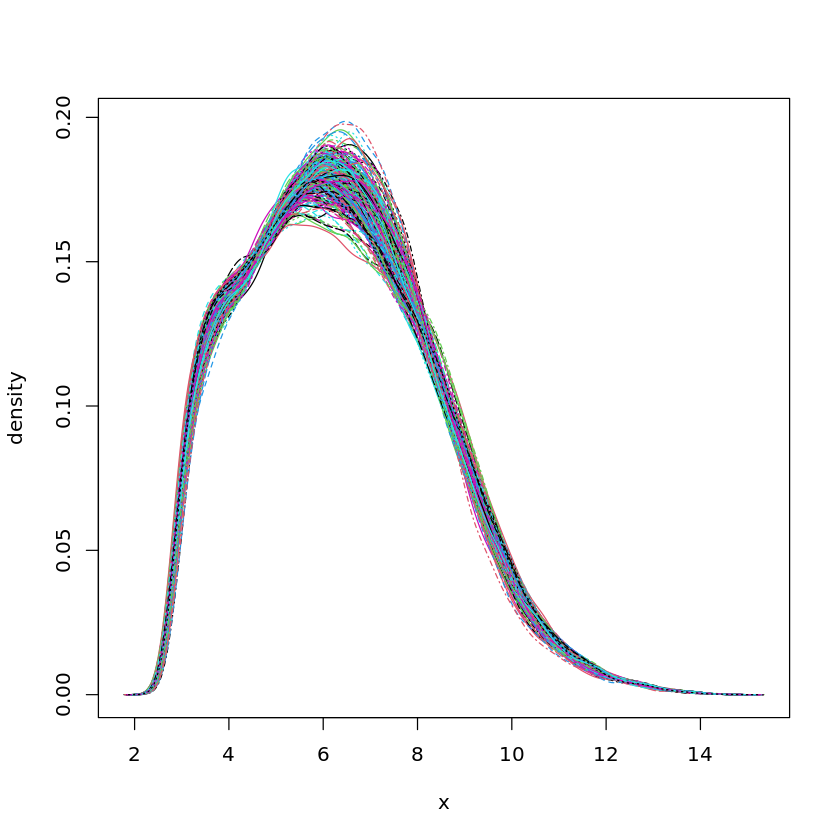

In [11]:
plotDensity(exprs(my.rma))

## Download metadata

In [12]:
# Get published data and metadata
# This step is a bit slow because of download and reformatting
my.geo.gse <- getGEO(GEO=my.gse, filename=NULL, destdir=paste(geopath,my.gse,sep="/"), GSElimits=NULL, GSEMatrix=TRUE, AnnotGPL=FALSE, getGPL=FALSE)
##explore structure of data
class(my.geo.gse)

Found 1 file(s)

GSE48350_series_matrix.txt.gz


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  ID_REF = col_character()
)
i Use `spec()` for the full column specifications.




[1] "list"

In [13]:
# Get rid of list structure
my.geo.gse <- my.geo.gse[[1]]

# Object is now an ExpressionSet
class(my.geo.gse)
# str(my.geo.gse) # structure of the object

[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

In [14]:
colnames(pData(my.geo.gse))

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "characteristics_ch1.3"   "characteristics_ch1.4"  
[15] "characteristics_ch1.5"   "treatment_protocol_ch1" 
[17] "growth_protocol_ch1"     "molecule_ch1"           
[19] "extract_protocol_ch1"    "label_ch1"              
[21] "label_protocol_ch1"      "taxid_ch1"              
[23] "hyb_protocol"            "scan_protocol"          
[25] "description"             "data_processing"        
[27] "platform_id"             "contact_name"           
[29] "contact_email"           "contact_phone"          
[31] "contact_laboratory"      "contact_department"     
[33] "contact_institute"       "contact_address"        
[35] "contact_city"            "contact_state"          
[37] "contact_zip/postal_code" "contact_country"        
[39] "supplementary_file"      "data_row_count"         
[41] "relation"                "relation.1"             
[43] "age (yrs):ch1"           "apoe genotype:ch1"      
[45] "braak stage:ch1"         "brain region:ch1"       
[47] "gender:ch1"              "individual:ch1"         
[49] "mmse:ch1"

**You can get information about the expresion values processing and get the expression matrix - but we are building the expression matrix from CEL files.**

In [15]:
# Get info about the expresion values processing
pData(my.geo.gse)$data_processing[1]

[1] "GC-RMA expression values were obtained from CEL files using GeneSpring 7.3.1 software.  PLIER expression values were obtained using Expression Console software using default settings.  PLIER and GC-RMA data were processed using GeneSpring 7.0 software, with default normalizations (Data transformation:set values<0.01 to 0.01; per chip: normalize to 50th percentile; per gene: normalize to median)."

In [16]:
# We are not using this matrix - instead we are creating it from CEL files
head(exprs(my.geo.gse))

,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170,GSM300171,GSM300172,GSM300173,GSM300174,GSM300175,...,GSM1176266,GSM1176267,GSM1176268,GSM1176269,GSM1176270,GSM1176271,GSM1176272,GSM1176273,GSM1176274,GSM1176275
1007_s_at,0.8880162,1.4355185,1.6096015,1.754960,1.820730,1.439672,1.587641,0.5247102,0.7965701,0.5960870,...,1.0286504,0.7742856,1.3370730,1.2449067,2.0870990,0.9598616,1.4419134,0.9046245,0.6691723,0.7139988
1053_at,0.6664604,0.8858521,1.8590777,1.036666,1.421393,1.485035,1.186292,0.8766241,0.9177160,1.0181772,...,1.0447342,0.7894049,0.8387071,0.8256752,1.0045998,0.9361171,1.0000000,0.8347580,1.1221228,1.2028491
117_at,0.8596384,1.0620298,3.0973945,2.243655,5.060301,13.800817,2.211287,0.8244940,1.6506448,0.7231523,...,0.9314508,1.9034239,1.4522284,1.5489688,1.0649894,0.9482248,0.8252233,1.0813574,1.4899012,1.4769499
121_at,0.9751495,1.0507448,0.9822838,1.198237,1.039529,0.781454,1.011910,1.1515149,0.9600830,0.9088924,...,0.9805651,1.1529822,1.0000000,0.5946454,1.0243831,1.1400663,0.5779311,1.1566760,0.8612242,1.1281321
1255_g_at,0.4912547,0.5375254,3.1796446,1.514290,2.185801,3.541644,2.213126,1.4224472,5.0114130,1.3302159,...,0.5600502,0.5545732,0.6137561,0.5215817,0.5309007,0.5487424,0.4580667,0.5523410,0.4745264,0.5590905
1294_at,0.8344268,0.9291890,1.5193694,1.557089,1.641263,1.026549,2.301065,0.7822667,1.0053184,0.8813058,...,0.6973125,0.9760558,1.3443304,0.9339589,1.3224157,0.9217435,1.1068690,1.0624748,0.9993446,1.1292602


## Missing expression values

In [17]:
# Report sum of na values per columm
apply(is.na(exprs(my.rma)),2,sum)

GSM1176196_1105A-08_EC_48_Affy.CEL.gz 
                                        0 
         GSM1176197_1105A-08_EC_15.CEL.gz 
                                        0 
 GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz 
                                        0 
 GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz 
                                        0 
 GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz 
                                        0 
 GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz 
                                        0 
    GSM1176202_1105A-08_EC_75_Affy.CEL.gz 
                                        0 
         GSM1176203_1105A-08_EC_11.CEL.gz 
                                        0 
 GSM1176204_1205A-07-EC-69_AffyHyb.CEL.gz 
                                        0 
         GSM1176205_1105A-08_EC_51.CEL.gz 
                                        0 
         GSM1176206_1105A-08_EC_74.CEL.gz 
                                        0 
    GSM1176207_1105A-08_EC_92_Affy.CEL.gz 
                                        0 
 GSM1176208_1205A-07_EC-19_AffyHyb.CEL.gz 
                                        0 
 GSM1176209_0606A-05_EC_05_AffyHyb.CEL.gz 
                                        0 
 GSM1176210_0606A-05_EC_90_AffyHyb.CEL.gz 
                                        0 
  GSM1176211_1105A-08_HC-20_Affy_2.CEL.gz 
                                        0 
         GSM1176212_1105A-08_HC_37.CEL.gz 
                                        0 
 GSM1176213_1205A-07_HC-48_AffyHyb.CEL.gz 
                                        0 
 GSM1176214_1205A-07-HC-16_AffyHyb.CEL.gz 
                                        0 
         GSM1176215_1105A-08_HC_15.CEL.gz 
                                        0 
         GSM1176216_1105A-08_HC_24.CEL.gz 
                                        0 
 GSM1176217_0606A-05_HC_23_AffyHyb.CEL.gz 
                                        0 
 GSM1176218_0606A-05_HC_36_AffyHyb.CEL.gz 
                                        0 
    GSM1176219_1105A-08_HC-75_Affy.CEL.gz 
                                        0 
    GSM1176220_1105A-08_HC-11_Affy.CEL.gz 
                                        0 
    GSM1176221_1105A-08_HC_33_Affy.CEL.gz 
                                        0 
    GSM1176222_1105A-08_HC-69_Affy.CEL.gz 
                                        0 
 GSM1176223_0606A-05_HC_07_AffyHyb.CEL.gz 
                                        0 
 GSM1176224_1205A-07_HC-43_AffyHyb.CEL.gz 
                                        0 
    GSM1176225_1105A-08_HC-51_Affy.CEL.gz 
                                        0 
    GSM1176226_1105A-08_HC_92_Affy.CEL.gz 
                                        0 
 GSM1176227_1205A-07_HC-19_AffyHyb.CEL.gz 
                                        0 
 GSM1176228_0606A-05_HC_05_AffyHyb.CEL.gz 
                                        0 
 GSM1176229_1205A-07-HC-90_AffyHyb.CEL.gz 
                                        0 
GSM1176230_0606A-05_PCG_20_AffyHyb.CEL.gz 
                                        0 
GSM1176231_1205A-07_PCG-37_AffyHyb.CEL.gz 
                                        0 
   GSM1176232_1105A-08_PCG_48_Affy.CEL.gz 
                                        0 
   GSM1176233_1105A-08_PCG_15_Affy.CEL.gz 
                                        0 
   GSM1176234_1105A-08_PCG_13_Affy.CEL.gz 
                                        0 
GSM1176235_0606A-05_PCG_09_AffyHyb.CEL.gz 
                                        0 
GSM1176236_0306A-02_PCG-24_AffyHyb.CEL.gz 
                                        0 
GSM1176237_0606A-05_PCG_57_AffyHyb.CEL.gz 
                                        0 
GSM1176238_1205A-07_PCG-23_AffyHyb.CEL.gz 
                                        0 
        GSM1176239_1105A-08_PCG_36.CEL.gz 
                                        0 
GSM1176240_1205A-07_PCG-06_AffyHyb.CEL.gz 
                                        0 
GSM1176241_1205A-07_PCG-75_AffyHyb.CEL.gz 
                                        0 
   GSM1176242_1105A-08_PCG_11_Affy.CEL.gz 
     

In [18]:
expr.complete<-exprs(my.rma)[complete.cases(exprs(my.rma)), ]
dim(expr.complete)

[1] 54675   253

There are no missing values

## Process pheno data and merge with expression data

We show here how to link phenodata to the correct CEL file. The affy package requires that the data frame and the CEL files have the same the rownames. Be careful at this step because you don't want to assign the wrong experimental data to a sample!

This particular GEO needs more preprocessing in order to get a clear case/control phenotype so the final clean dataset is provided. However, a minimum processing is done here for ilustration purposes.

In [19]:
# Make data frame of phenoData
my.pdata <- as.data.frame(pData(my.geo.gse), stringsAsFactors=F)
head(my.pdata,4)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,data_row_count,relation,relation.1,age (yrs):ch1,apoe genotype:ch1,braak stage:ch1,brain region:ch1,gender:ch1,individual:ch1,mmse:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM300166,PostcentralGyrus_female_91yrs_indiv10,GSM300166,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019,RNA,1,"brain, postcentral gyrus, female, 91 years",Homo sapiens,"individual: 10, C",...,54675,Reanalyzed by: GSE119087,Reanalyzed by: GSE133349,91,NA,NA,postcentral gyrus,female,"10, C",NA
GSM300167,SuperiorFrontalGyrus_female_91yrs_indiv10,GSM300167,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019,RNA,1,"brain, superior frontal gyrus, female, 91 years",Homo sapiens,"individual: 10, C",...,54675,Reanalyzed by: GSE119087,Reanalyzed by: GSE133349,91,NA,NA,superior frontal gyrus,female,"10, C",NA
GSM300168,Hippocampus_female_96yrs_indiv105,GSM300168,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019,RNA,1,"brain, hippocampus, female, 96 years",Homo sapiens,"individual: 105, C",...,54675,Reanalyzed by: GSE119087,Reanalyzed by: GSE133349,96,NA,NA,hippocampus,female,"105, C",NA
GSM300169,Hippocampus_male_82yrs_indiv106,GSM300169,Public on Oct 09 2008,Jun 25 2008,Jun 26 2019,RNA,1,"brain, hippocampus, male, 82 years",Homo sapiens,"individual: 106, C",...,54675,Reanalyzed by: GSE119087,Reanalyzed by: GSE133349,82,NA,NA,hippocampus,male,"106, C",NA


In [20]:
colnames(my.pdata)

[1] "title"                   "geo_accession"          
 [3] "status"                  "submission_date"        
 [5] "last_update_date"        "type"                   
 [7] "channel_count"           "source_name_ch1"        
 [9] "organism_ch1"            "characteristics_ch1"    
[11] "characteristics_ch1.1"   "characteristics_ch1.2"  
[13] "characteristics_ch1.3"   "characteristics_ch1.4"  
[15] "characteristics_ch1.5"   "treatment_protocol_ch1" 
[17] "growth_protocol_ch1"     "molecule_ch1"           
[19] "extract_protocol_ch1"    "label_ch1"              
[21] "label_protocol_ch1"      "taxid_ch1"              
[23] "hyb_protocol"            "scan_protocol"          
[25] "description"             "data_processing"        
[27] "platform_id"             "contact_name"           
[29] "contact_email"           "contact_phone"          
[31] "contact_laboratory"      "contact_department"     
[33] "contact_institute"       "contact_address"        
[35] "contact_city"            "contact_state"          
[37] "contact_zip/postal_code" "contact_country"        
[39] "supplementary_file"      "data_row_count"         
[41] "relation"                "relation.1"             
[43] "age (yrs):ch1"           "apoe genotype:ch1"      
[45] "braak stage:ch1"         "brain region:ch1"       
[47] "gender:ch1"              "individual:ch1"         
[49] "mmse:ch1"

In [21]:
my.pdata <- my.pdata[, c("title", "geo_accession", "description","age (yrs):ch1","gender:ch1","brain region:ch1","apoe genotype:ch1","braak stage:ch1","brain region:ch1","mmse:ch1")]
my.pdata <- my.pdata[order(rownames(my.pdata)), ]
dim(my.pdata)
head(my.pdata, 4)

[1] 253  10

,title,geo_accession,description,age (yrs):ch1,gender:ch1,brain region:ch1,apoe genotype:ch1,braak stage:ch1,brain region:ch1.1,mmse:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1176196,entorhinal cortex_female_76_AD_48,GSM1176196,post-mortem tissue,76,female,entorhinal cortex,"3,3",V,entorhinal cortex,3
GSM1176197,entorhinal cortex_female_86_AD_15,GSM1176197,post-mortem tissue,86,female,entorhinal cortex,"4,4",VI,entorhinal cortex,9
GSM1176198,entorhinal cortex_female_82_AD_9,GSM1176198,post-mortem tissue,82,female,entorhinal cortex,"3,4",VI,entorhinal cortex,0
GSM1176199,entorhinal cortex_female_85_AD_24,GSM1176199,post-mortem tissue,85,female,entorhinal cortex,"3,4",IV,entorhinal cortex,26


In [22]:
# For this data, we need to do a bit of tinkering.
table(rownames(my.pdata) == my.cels)


FALSE 
  253 

In [23]:
# Create a dataframe extracting geo_accession from CEL file names
geo_accession=sub("_.*", "", my.cels)
geo_accession=sub("\\..*", "", geo_accession)
#my.cels.df=data.frame(row.names=geo_accession,"CEL"=my.cels)
my.cels.df=data.frame(row.names=my.cels,"geo_accession"=geo_accession)
head(my.cels.df)

,geo_accession
,<chr>
GSM1176196_1105A-08_EC_48_Affy.CEL.gz,GSM1176196
GSM1176197_1105A-08_EC_15.CEL.gz,GSM1176197
GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz,GSM1176198
GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz,GSM1176199
GSM1176200_1205A-07-EC-36_AffyHyb.CEL.gz,GSM1176200
GSM1176201_1205A-07_EC-06_AffyHyb.CEL.gz,GSM1176201


In [24]:
# my.pdata and my.cels.df now have same rownames
#table(rownames(my.pdata) == rownames(my.cels.df))
table(rownames(my.pdata) == my.cels.df$geo_accession)


TRUE 
 253 

In [25]:
# pdata ready
rownames(my.pdata)=rownames(my.cels.df)
head(my.pdata,4)

,title,geo_accession,description,age (yrs):ch1,gender:ch1,brain region:ch1,apoe genotype:ch1,braak stage:ch1,brain region:ch1.1,mmse:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1176196_1105A-08_EC_48_Affy.CEL.gz,entorhinal cortex_female_76_AD_48,GSM1176196,post-mortem tissue,76,female,entorhinal cortex,"3,3",V,entorhinal cortex,3
GSM1176197_1105A-08_EC_15.CEL.gz,entorhinal cortex_female_86_AD_15,GSM1176197,post-mortem tissue,86,female,entorhinal cortex,"4,4",VI,entorhinal cortex,9
GSM1176198_1205A-07_EC-09_AffyHyb.CEL.gz,entorhinal cortex_female_82_AD_9,GSM1176198,post-mortem tissue,82,female,entorhinal cortex,"3,4",VI,entorhinal cortex,0
GSM1176199_1205A-07_EC-24_AffyHyb.CEL.gz,entorhinal cortex_female_85_AD_24,GSM1176199,post-mortem tissue,85,female,entorhinal cortex,"3,4",IV,entorhinal cortex,26


**We now have the phenodata ready, but we will be using another data that has already been preprocessed to include clear case/control phenotypes and APOE genotypes:**

In [26]:
phenodata=read.table("/mnt/data/GWES/Microarray/input/clinicalset.GSE48350")
dim(phenodata)
head(phenodata)

[1] 247   6

,Region,Age,Sex,Status,ApoE,APOEgroup
,<chr>,<int>,<chr>,<chr>,<int>,<chr>
GSM1176196,entorhinalcortex,76,female,Case,33,group3
GSM1176197,entorhinalcortex,86,female,Control,44,group4
GSM1176198,entorhinalcortex,82,female,Case,34,group4
GSM1176199,entorhinalcortex,85,female,Case,23,group2
GSM1176200,entorhinalcortex,90,female,Case,34,group4
GSM1176201,entorhinalcortex,90,female,Case,34,group4


To match this phenodata with the expresion data we get from CEL, let's convert the column names of the expresion dataframe to sample names:

In [32]:
table(colnames(exprs(my.rma)) == rownames(my.cels.df))


TRUE 
 253 

In [34]:
expressionset<-exprs(my.rma)
colnames(expressionset) <- my.cels.df$geo_accession
head(expressionset,n=3)

,GSM1176196,GSM1176197,GSM1176198,GSM1176199,GSM1176200,GSM1176201,GSM1176202,GSM1176203,GSM1176204,GSM1176205,...,GSM300331,GSM300332,GSM300333,GSM300335,GSM300338,GSM300339,GSM300340,GSM300341,GSM318840,GSM350078
1007_s_at,12.040740,11.173363,11.805107,11.520710,11.554977,11.238944,11.924660,11.467062,11.828813,10.403868,...,10.746467,11.263029,11.587320,10.647399,10.739888,11.334689,11.032435,10.514415,10.909077,10.610349
1053_at,6.702574,6.369982,6.232879,6.253487,6.286031,6.524358,6.488864,6.704865,6.500081,6.512391,...,6.826001,6.411964,6.308492,6.780958,6.617161,6.570866,6.752661,6.717355,6.313379,6.442135
117_at,6.097215,5.893449,6.257163,6.211781,6.229210,5.807598,6.338025,6.074785,6.161630,6.061308,...,5.780972,5.959948,6.002889,5.907806,5.916647,5.647911,5.610944,5.999280,6.263555,5.622806


In [35]:
outpath="/mnt/data/GWES/Microarray/output/GSE48350"
dir.create(file.path(outpath))

Warning message in dir.create(file.path(outpath)):
"'/mnt/data/GWES/Microarray/output/GSE48350' already exists"


In [36]:
save(phenodata, expressionset, file=paste(outpath,"objects.RData",sep="/"))

**For the next step, Differential Expression, you need the following:**

- objects.RData (containing the expression and phenodata datasets)